In [5]:
# importing libraries
from time import time
import multiprocessing
import numpy as np
import pandas as pd
from tqdm import tqdm
import os
from glob import glob
import skimage
import torch
import SimpleITK as sitk
import skimage, torch, torchvision
import torchxrayvision as xrv
import torchvision
import torchxrayvision as xrv
import matplotlib.pyplot as plt
import sys
import warnings
from sklearn.metrics import r2_score
from sklearn.utils import shuffle
import random
import logging
from sklearn.metrics import roc_curve,roc_auc_score,precision_recall_curve,auc,accuracy_score,classification_report,confusion_matrix
import tensorflow as tf
from keras.models import load_model
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [6]:
def AUC_ROC_Binary(y_true,y_score):
    y_true=y_true.reshape((-1,1))
    y_score=y_score.reshape((-1,1))
    fpr, tpr, thresholds = roc_curve(y_true, y_score,pos_label=1)
    score_value = roc_auc_score(y_true=y_true, y_score=y_score)
    plt.figure(dpi=150)
    plt.plot(fpr, tpr,label="Male (class 1) vs Female (class 0) \n (AUC={:.2f})".format(score_value))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('AUC-ROC for the Prediction Gender (Male vs Female)')
    plt.plot(y_score,y_score,'--k')
    plt.grid(which='both')
    plt.legend()
    plt.show()

def AUC_Precision_Recall(y_true,y_score):
    y_true=y_true.reshape((-1,1))
    y_score=y_score.reshape((-1,1))
    precision, recall, thresholds = precision_recall_curve(y_true, y_score)
    plt.figure(dpi=150)
    auc_score = auc(y=precision, x=recall)
    # ,label="White vs African-American/Asian \n (AUC={:.2f})".format(score_value)
    plt.plot(recall[::5],precision[::5],label="Male vs Female \n (precision-recall AUC={:.2f})".format(auc_score))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('AUC-ROC for the Prediction of Gender (Male vs Female)')
    plt.grid(which='both')
    plt.legend()
    plt.show()

def prob2categ(y_true,y_score):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    gmeans = np.sqrt(tpr * (1-fpr))
    return gmeans[np.argmax(gmeans)]



209/209 [==============================] - 0s 1ms/step


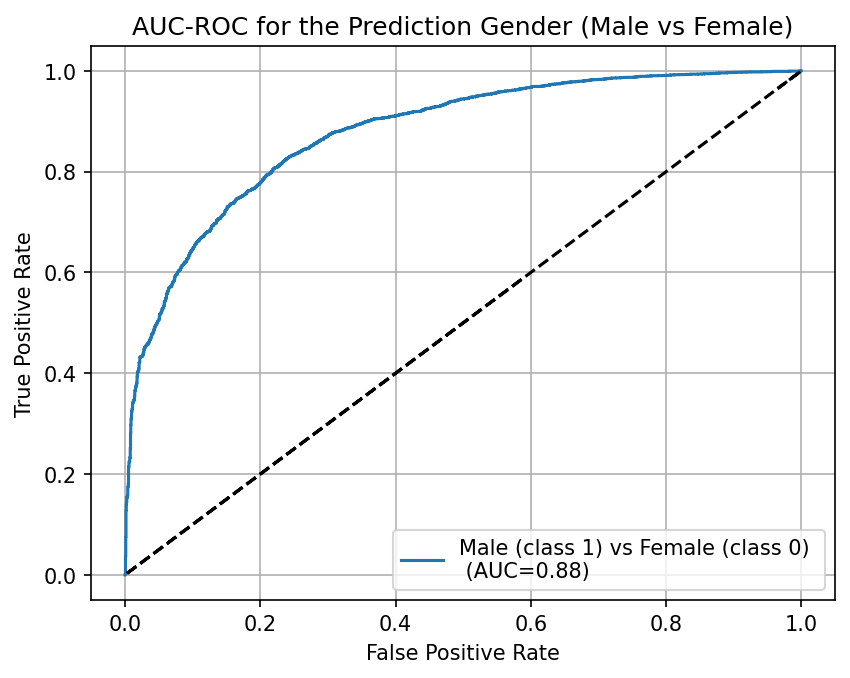

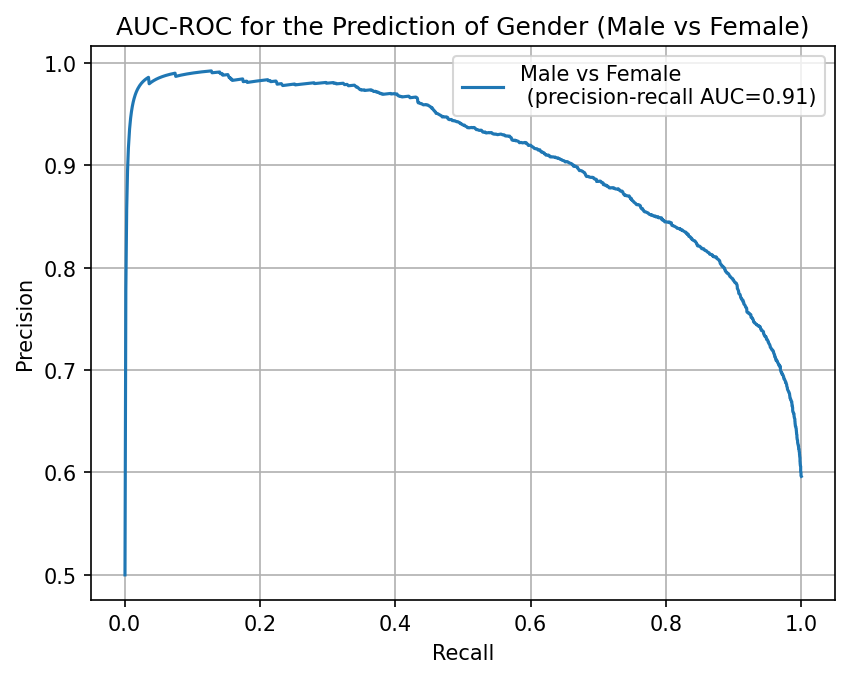

The optimum Threshold is: 0.79
              precision    recall  f1-score   support

           0       0.63      0.90      0.74      2691
           1       0.91      0.64      0.75      3973

    accuracy                           0.75      6664
   macro avg       0.77      0.77      0.75      6664
weighted avg       0.79      0.75      0.75      6664

[[2433  258]
 [1438 2535]]


In [9]:
name = 'NIH_sex_full_'
test_data = np.load(name + 'belongings.npy',allow_pickle=True).item()
x_nih_total = test_data['x_test']
y_nih_total = test_data['y_test']
mask_nih_total = test_data['mask_excluded']
model_nih_total = load_model(name + '_mdl.h5')
y_predict_nih_total = model_nih_total.predict(x_nih_total[:,mask_nih_total])
AUC_ROC_Binary(y_true=y_nih_total,y_score=y_predict_nih_total)
AUC_Precision_Recall(y_true=y_nih_total,y_score=y_predict_nih_total)
threshold = prob2categ(y_nih_total,y_predict_nih_total)
print('The optimum Threshold is: {:.2f}'.format(threshold))
class_pred = y_predict_nih_total.copy()
class_pred[class_pred>threshold]=1
class_pred[class_pred<=threshold]=0
print(classification_report(y_true=y_nih_total, y_pred=class_pred))
cm = confusion_matrix(y_true=y_nih_total, y_pred=class_pred)
print(cm)

209/209 [==============================] - 0s 921us/step


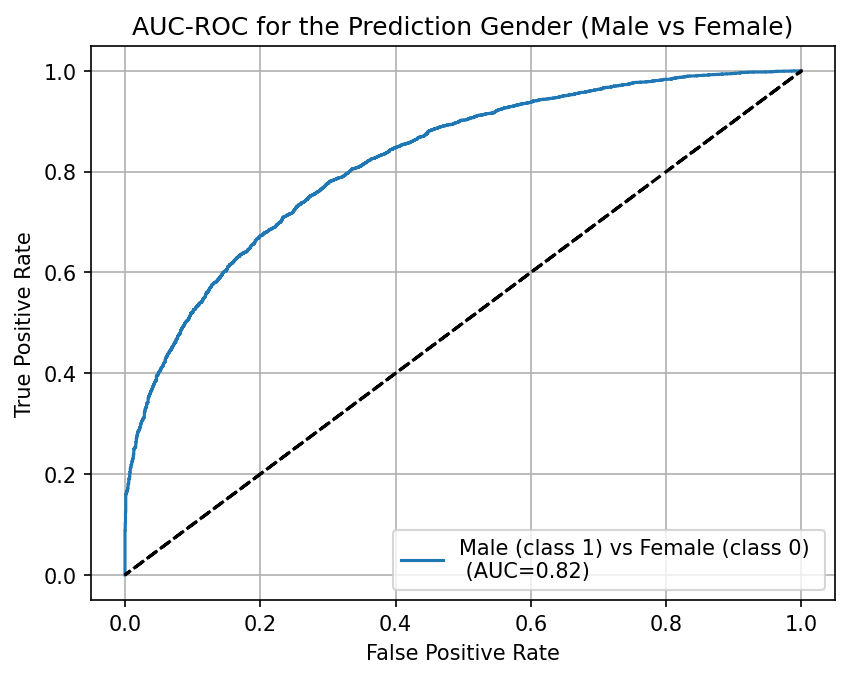

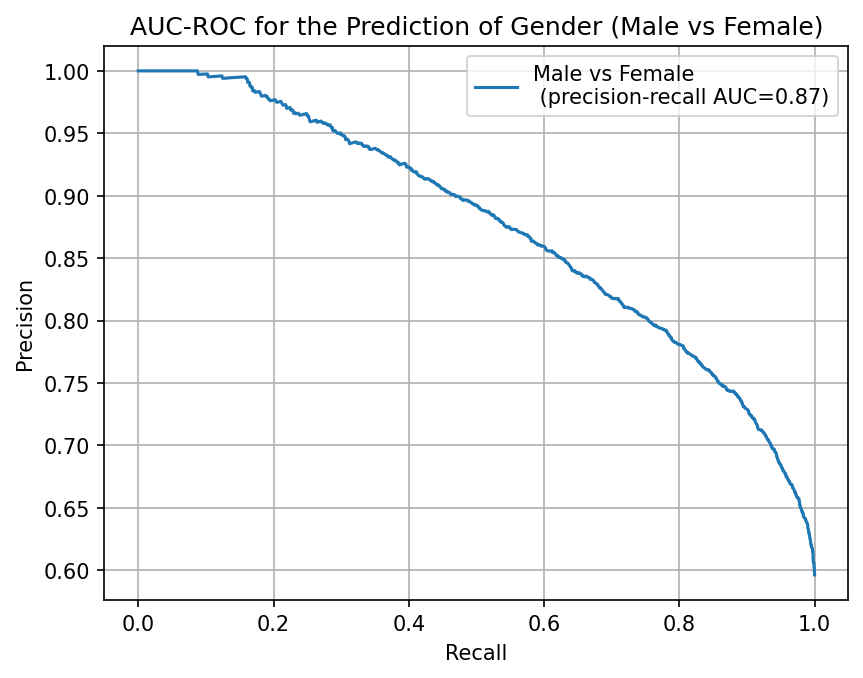

The optimum Threshold is: 0.74
              precision    recall  f1-score   support

           0       0.57      0.89      0.69      2691
           1       0.88      0.54      0.67      3973

    accuracy                           0.68      6664
   macro avg       0.72      0.71      0.68      6664
weighted avg       0.75      0.68      0.68      6664

[[2396  295]
 [1836 2137]]


In [13]:
name = 'NIH_sex_segments_segment_0__'
test_data = np.load(name + 'belongings.npy',allow_pickle=True).item()
x_nih_seg_0 = test_data['x_test']
y_nih_seg_0 = test_data['y_test']
mask_nih_seg_0 = test_data['mask_excluded']
model_nih_seg_0 = load_model(name + '_mdl.h5')
y_predict_nih_seg_0 = model_nih_seg_0.predict(x_nih_seg_0[:,mask_nih_seg_0])
AUC_ROC_Binary(y_true=y_nih_seg_0,y_score=y_predict_nih_seg_0)
AUC_Precision_Recall(y_true=y_nih_seg_0,y_score=y_predict_nih_seg_0)
threshold = prob2categ(y_nih_seg_0,y_predict_nih_seg_0)
print('The optimum Threshold is: {:.2f}'.format(threshold))
class_pred = y_predict_nih_seg_0.copy()
class_pred[class_pred>threshold]=1
class_pred[class_pred<=threshold]=0
print(classification_report(y_true=y_nih_seg_0, y_pred=class_pred))
cm = confusion_matrix(y_true=y_nih_seg_0, y_pred=class_pred)
print(cm)

209/209 [==============================] - 0s 952us/step


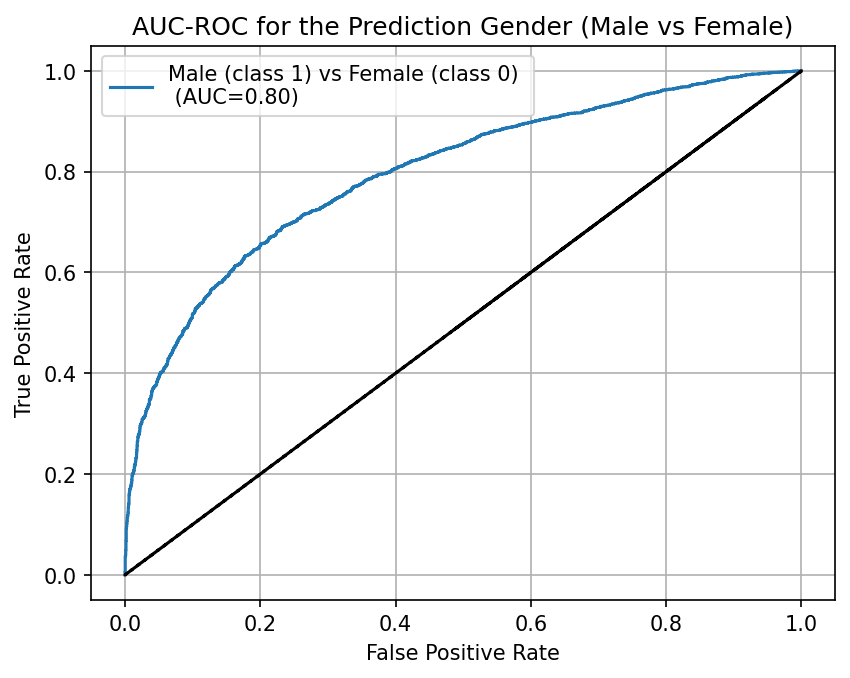

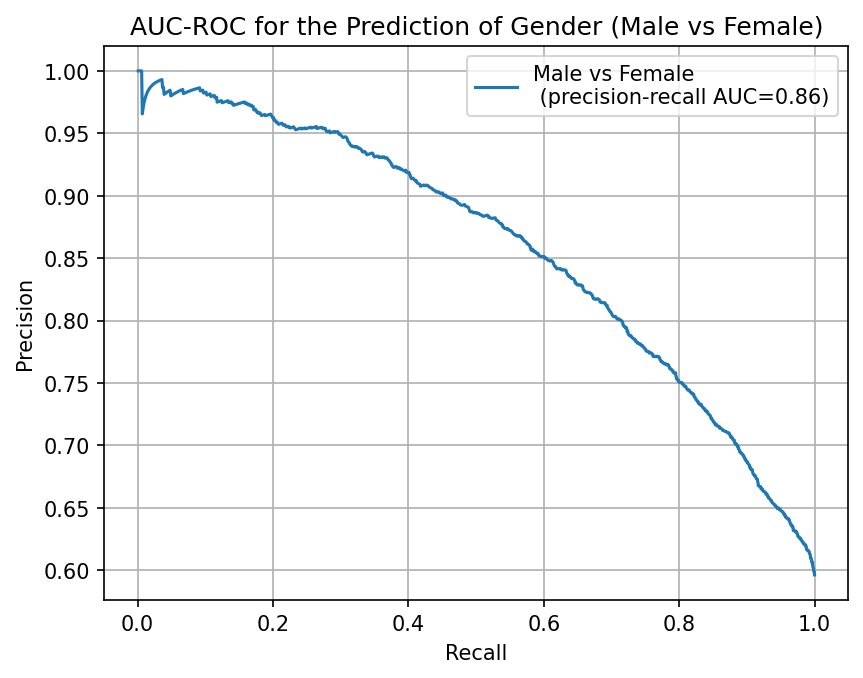

The optimum Threshold is: 0.73
              precision    recall  f1-score   support

           0       0.58      0.87      0.69      2691
           1       0.86      0.57      0.69      3973

    accuracy                           0.69      6664
   macro avg       0.72      0.72      0.69      6664
weighted avg       0.75      0.69      0.69      6664

[[2330  361]
 [1696 2277]]


In [14]:
name = 'NIH_sex_segments_segment_1__'
test_data = np.load(name + 'belongings.npy',allow_pickle=True).item()
x_nih_seg_1 = test_data['x_test']
y_nih_seg_1 = test_data['y_test']
mask_nih_seg_1 = test_data['mask_excluded']
model_nih_seg_1 = load_model(name + '_mdl.h5')
y_predict_nih_seg_1 = model_nih_seg_1.predict(x_nih_seg_1[:,mask_nih_seg_1])
AUC_ROC_Binary(y_true=y_nih_seg_1,y_score=y_predict_nih_seg_1)
AUC_Precision_Recall(y_true=y_nih_seg_1,y_score=y_predict_nih_seg_1)
threshold = prob2categ(y_nih_seg_1,y_predict_nih_seg_1)
print('The optimum Threshold is: {:.2f}'.format(threshold))
class_pred = y_predict_nih_seg_1.copy()
class_pred[class_pred>threshold]=1
class_pred[class_pred<=threshold]=0
print(classification_report(y_true=y_nih_seg_1, y_pred=class_pred))
cm = confusion_matrix(y_true=y_nih_seg_1, y_pred=class_pred)
print(cm)

209/209 [==============================] - 0s 940us/step


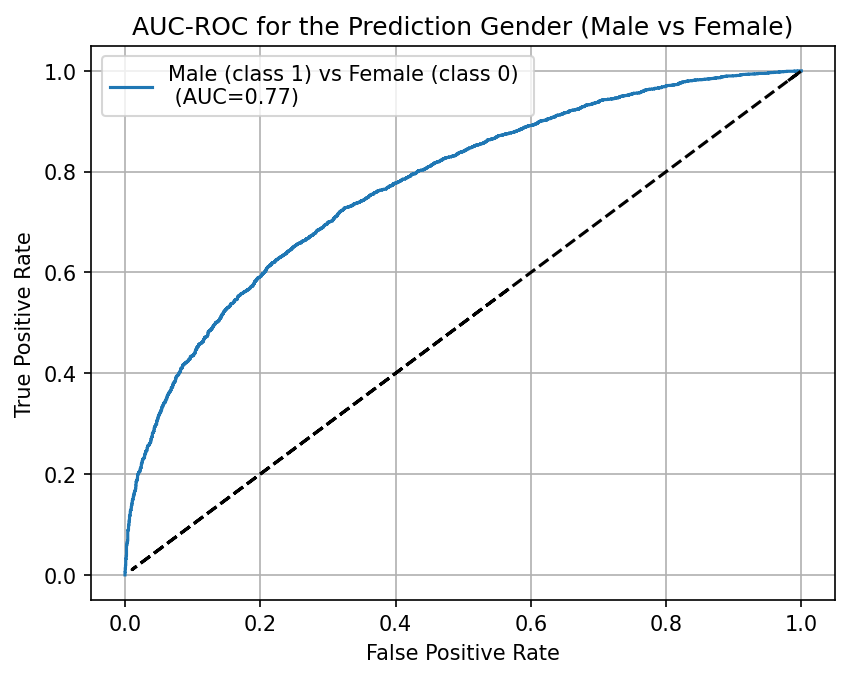

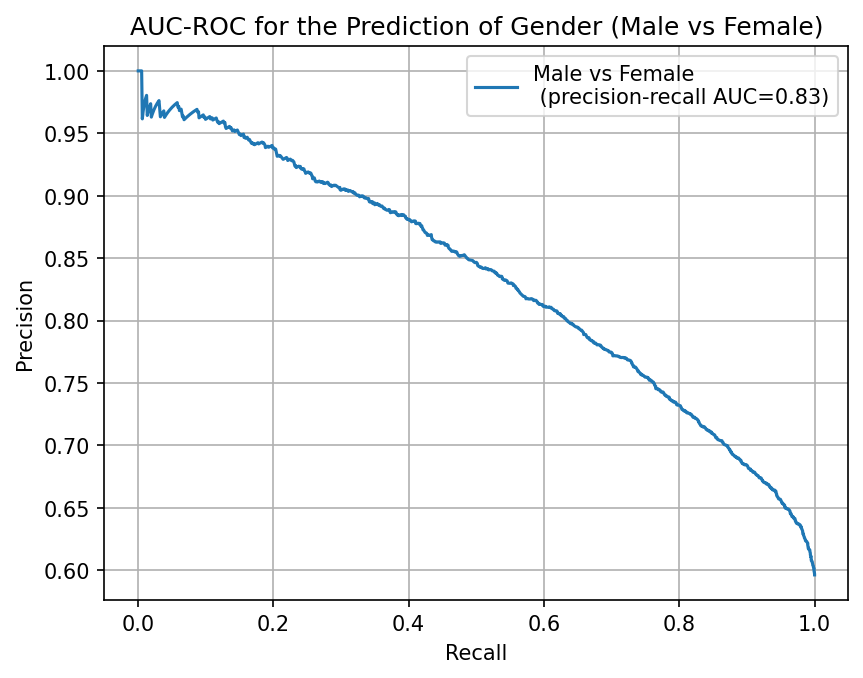

The optimum Threshold is: 0.70
              precision    recall  f1-score   support

           0       0.55      0.85      0.67      2691
           1       0.84      0.53      0.65      3973

    accuracy                           0.66      6664
   macro avg       0.69      0.69      0.66      6664
weighted avg       0.72      0.66      0.66      6664

[[2289  402]
 [1880 2093]]


In [15]:
name = 'NIH_sex_segments_segment_2__'
test_data = np.load(name + 'belongings.npy',allow_pickle=True).item()
x_nih_seg_2 = test_data['x_test']
y_nih_seg_2 = test_data['y_test']
mask_nih_seg_2 = test_data['mask_excluded']
model_nih_seg_2 = load_model(name + '_mdl.h5')
y_predict_nih_seg_2 = model_nih_seg_2.predict(x_nih_seg_2[:,mask_nih_seg_2])
AUC_ROC_Binary(y_true=y_nih_seg_2,y_score=y_predict_nih_seg_2)
AUC_Precision_Recall(y_true=y_nih_seg_2,y_score=y_predict_nih_seg_2)
threshold = prob2categ(y_nih_seg_2,y_predict_nih_seg_2)
print('The optimum Threshold is: {:.2f}'.format(threshold))
class_pred = y_predict_nih_seg_2.copy()
class_pred[class_pred>threshold]=1
class_pred[class_pred<=threshold]=0
print(classification_report(y_true=y_nih_seg_2, y_pred=class_pred))
cm = confusion_matrix(y_true=y_nih_seg_2, y_pred=class_pred)
print(cm)

209/209 [==============================] - 0s 946us/step


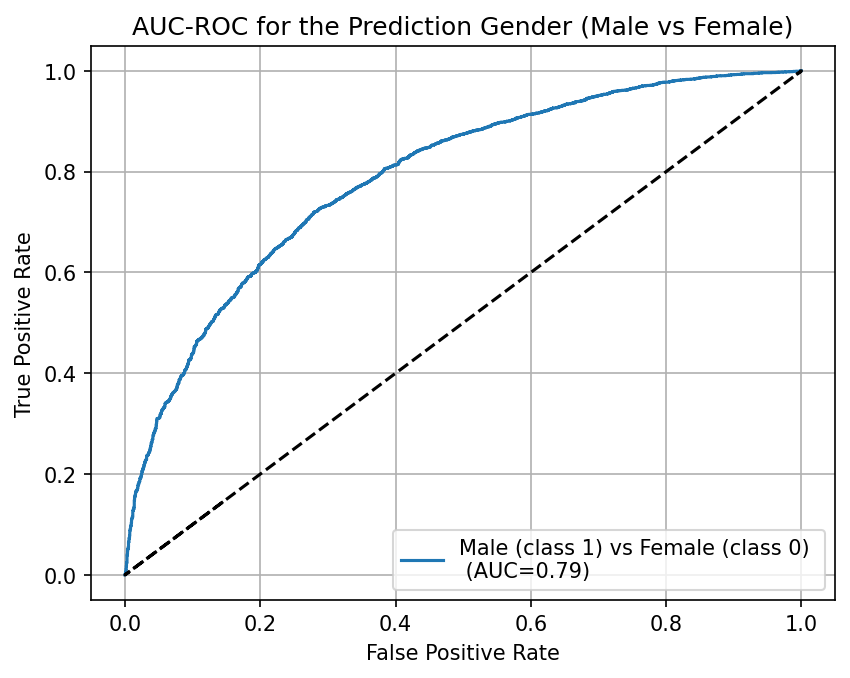

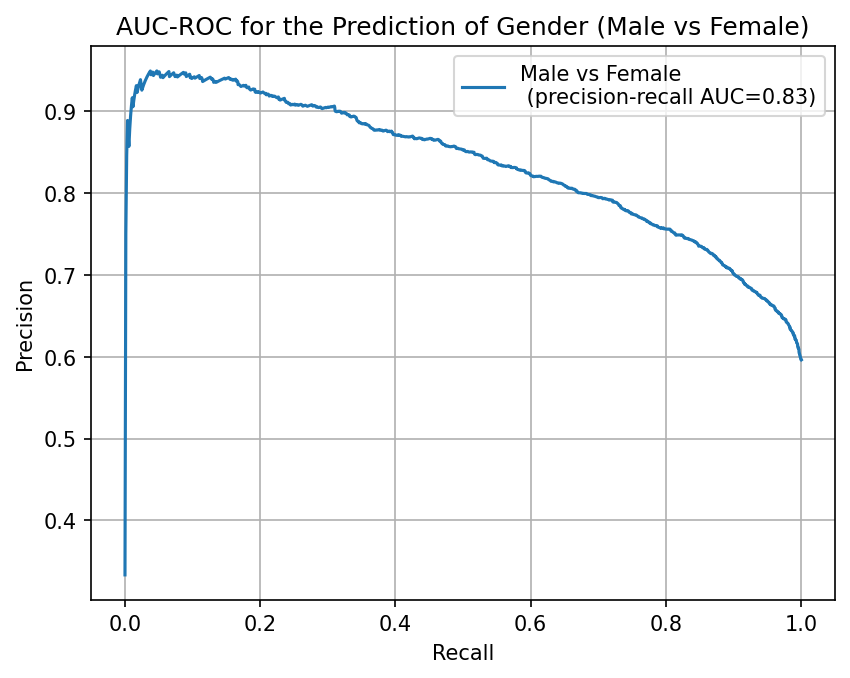

The optimum Threshold is: 0.72
              precision    recall  f1-score   support

           0       0.54      0.87      0.67      2691
           1       0.85      0.50      0.63      3973

    accuracy                           0.65      6664
   macro avg       0.70      0.69      0.65      6664
weighted avg       0.73      0.65      0.65      6664

[[2348  343]
 [1982 1991]]


In [16]:
name = 'NIH_sex_segments_segment_3__'
test_data = np.load(name + 'belongings.npy',allow_pickle=True).item()
x_nih_seg_3 = test_data['x_test']
y_nih_seg_3 = test_data['y_test']
mask_nih_seg_3 = test_data['mask_excluded']
model_nih_seg_3 = load_model(name + '_mdl.h5')
y_predict_nih_seg_3 = model_nih_seg_3.predict(x_nih_seg_3[:,mask_nih_seg_3])
AUC_ROC_Binary(y_true=y_nih_seg_3,y_score=y_predict_nih_seg_3)
AUC_Precision_Recall(y_true=y_nih_seg_3,y_score=y_predict_nih_seg_3)
threshold = prob2categ(y_nih_seg_3,y_predict_nih_seg_3)
print('The optimum Threshold is: {:.2f}'.format(threshold))
class_pred = y_predict_nih_seg_3.copy()
class_pred[class_pred>threshold]=1
class_pred[class_pred<=threshold]=0
print(classification_report(y_true=y_nih_seg_3, y_pred=class_pred))
cm = confusion_matrix(y_true=y_nih_seg_3, y_pred=class_pred)
print(cm)